In [1]:
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ust import utils as ust_utils
from ust.models import *
from ust.u_number import *
sns.set()

In [10]:
seed = 5813
testing_ds = 'Chinatown'
DATASET_FOLDER = os.path.join(os.getcwd(), "dataset", "Uncertain_Shapelet_ucr", "0_4")
DATASET_FOLDER

'/home/michael/Projects/ustc/dataset/Uncertain_Shapelet_ucr/0_4'

In [11]:
(utrain_X, utrain_y), (utest_X, utest_y) = ust_utils.load_uncertain_dataset(testing_ds, dataset_folder=DATASET_FOLDER)
udata = {
    'trainX': utrain_X,
    'trainy': utrain_y,
    'testX': utest_X,
    'testy': utest_y
}

## Uncertain shapelet classifier
**UST classifier using UED**

In [12]:
# from sktime.classifiers.compose import ColumnEnsembleClassifier

# utrain_X['dim_1'] = utrain_X.dim_0.copy()
# utrain_X['dim_2'] = utrain_X.dim_0.copy()
# utest_X['dim_1'] = utest_X.dim_0.copy()
# utest_X['dim_2'] = utest_X.dim_0.copy()

# print('utrain_X.shape', utrain_X.shape)

# pclf = ColumnEnsembleClassifier(estimators=[
#     (
#         f'ust_{b}', 
#         build_ust_nb_model(cmp_type=UNumber.INTERVAL_CMP, distance=UShapeletTransform.UED, seed=seed, 
#                            time_limit_in_mins=0.3, use_ugnb=True, predefined_ig_rejection_level=0.005), 
#         [i]
#     ) for i, b in enumerate(range(utrain_X.shape[1]))
# ])

# pclf.fit(utrain_X, utrain_y)
# print('Train finished')
# pclf.predict(utrain_X)

In [13]:
def build_and_run_ust_model(data, cmp_type, distance, seed=seed, time_limit_in_mins=0.5, use_ugnb=True):
    print("Comparison Strategy:", cmp_type)
    print("Distance:", distance)
    print("Time limit (mins):", time_limit_in_mins)
    print("Using Gaussian NB:", use_ugnb)
    
    ust_clf = build_ust_nb_model(cmp_type=cmp_type, 
                                 distance=distance, seed=seed, time_limit_in_mins=time_limit_in_mins, use_ugnb=use_ugnb)

    start = time.time()
    ust_clf.fit(utrain_X, utrain_y)
    
    print("Score:", ust_clf.score(utest_X, utest_y))
    print("Duration:", time.time() - start)
    print("Nb shapelets:", len(ust_clf['st'].shapelets))
    return ust_clf

**ST classifier**

In [14]:
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.SIMPLE_CMP, distance=UShapeletTransform.ED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=True)
print("--------------------------")
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.SIMPLE_CMP, distance=UShapeletTransform.ED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=False)

Comparison Strategy: simple_cmp
Distance: ed
Time limit (mins): 0.5
Using Gaussian NB: True
Score: 0.9300291545189504
Duration: 66.1149971485138
Nb shapelets: 23
--------------------------
Comparison Strategy: simple_cmp
Distance: ed
Time limit (mins): 0.5
Using Gaussian NB: False
Score: 0.9329446064139941
Duration: 69.6303334236145
Nb shapelets: 24


**UST classifier using UED with Simple-based comparison of uncertain values**

In [15]:
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.INTERVAL_CMP, distance=UShapeletTransform.UED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=True)
print("--------------------------")
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.INTERVAL_CMP, distance=UShapeletTransform.UED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=False)

Comparison Strategy: interval_cmp
Distance: ued
Time limit (mins): 0.5
Using Gaussian NB: True
Score: 0.9650145772594753
Duration: 65.57052612304688
Nb shapelets: 23
--------------------------
Comparison Strategy: interval_cmp
Distance: ued
Time limit (mins): 0.5
Using Gaussian NB: False
Score: 0.9329446064139941
Duration: 67.61539840698242
Nb shapelets: 24


**UST classifier using UED with CDF-based comparison of uncertain values**

In [11]:
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.CDF_CMP, distance=UShapeletTransform.UED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=True)
print("--------------------------")
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.CDF_CMP, distance=UShapeletTransform.UED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=False)

Comparison Strategy: cdf_cmp
Distance: uncertain_ed
Time limit (mins): 0.5
Using Gaussian NB: True
Score: 0.5666666666666667
Duration: 49.922160625457764
Nb shapelets: 2
--------------------------
Comparison Strategy: cdf_cmp
Distance: uncertain_ed
Time limit (mins): 0.5
Using Gaussian NB: False
Score: 0.5266666666666666
Duration: 50.26394510269165
Nb shapelets: 2


**UST classifier using UED with Interval-based comparison of uncertain values**

In [8]:
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.INTERVAL_CMP, distance=UShapeletTransform.UED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=True)
print("--------------------------")
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.INTERVAL_CMP, distance=UShapeletTransform.UED, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=False)

Comparison Strategy: interval_cmp
Distance: uncertain_ed
Time limit (mins): 0.5
Using Gaussian NB: True
Score: 0.5866666666666667
Duration: 51.76545286178589
Nb shapelets: 4
--------------------------
Comparison Strategy: interval_cmp
Distance: uncertain_ed
Time limit (mins): 0.5
Using Gaussian NB: False
Score: 0.6266666666666667
Duration: 46.93990111351013
Nb shapelets: 3


**UST classifier using FOST**

In [7]:
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.SIMPLE_CMP, distance=UShapeletTransform.FOTS, 
                                  seed=seed, time_limit_in_mins=1.5, use_ugnb=True)
print("--------------------------")
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.SIMPLE_CMP, distance=UShapeletTransform.FOTS, 
                                  seed=seed, time_limit_in_mins=1.5, use_ugnb=False)

Comparison Strategy: simple_cmp
Distance: fots
Time limit (mins): 1.5
Using Gaussian NB: True
Score: 0.8221574344023324
Duration: 155.02719855308533
Nb shapelets: 22
--------------------------
Comparison Strategy: simple_cmp
Distance: fots
Time limit (mins): 1.5
Using Gaussian NB: False
Score: 0.8221574344023324
Duration: 147.12730860710144
Nb shapelets: 22


**UST classifier using DUST**

In [6]:
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.SIMPLE_CMP, distance=UShapeletTransform.DUST_UNIFORM, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=False)
print("-------------------------")
ust_clf = build_and_run_ust_model(data=udata, cmp_type=UNumber.SIMPLE_CMP, distance=UShapeletTransform.DUST_NORMAL, 
                                  seed=seed, time_limit_in_mins=0.5, use_ugnb=False)

Comparison Strategy: simple_cmp
Distance: dust_uniform
Time limit (mins): 0.5
Using Gaussian NB: False
Score: 0.8979591836734694
Duration: 78.08677172660828
Nb shapelets: 23
-------------------------
Comparison Strategy: simple_cmp
Distance: dust_normal
Time limit (mins): 0.5
Using Gaussian NB: False
Score: 0.9037900874635568
Duration: 74.26493644714355
Nb shapelets: 21


## Simple shapelet classifier (uncertainty ignored)

In [26]:
(train_X, train_y), (test_X, test_y) = ust_utils.load_dataset(testing_ds, dataset_folder=DATASET_FOLDER)

In [27]:
st_clf = build_st_nb_model(seed=seed)

start = time.time()
st_clf.fit(train_X, train_y)
print("score", st_clf.score(test_X, test_y))
print("duration:", time.time() - start)
print("nb shapelets:", len(st_clf['st'].shapelets))

score 0.9416909620991254
duration: 41.98596692085266
nb shapelets: 22


## Visualize some shapelets

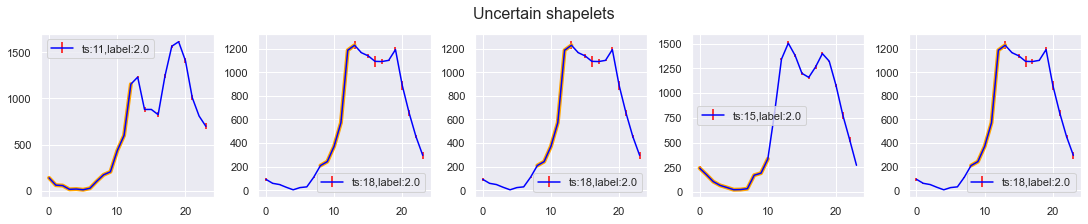

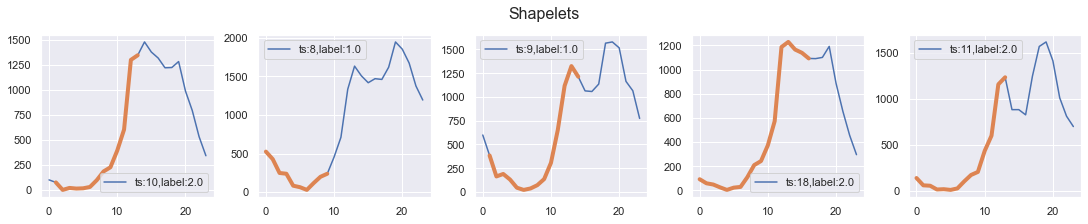

In [17]:
fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15, 3), constrained_layout=True)
for s, ax in zip(np.random.choice(ust_clf['st'].shapelets, 5), axes):
    ts = utrain_X.iloc[s.series_id]["dim_0"].values
    ts = np.array([[u, v] for u, v in ts])
    ax.errorbar(range(len(ts)), ts[:, 0], yerr=ts[:, 1], color='blue', ecolor='red', label=f"ts:{s.series_id},label:{train_y[s.series_id]}")
    shapelet = ts[s.start_pos:s.start_pos+s.length, 0]
    ax.plot(range(s.start_pos,s.start_pos+s.length), shapelet, linewidth=4.0, color='orange')
    ax.legend();
fig.suptitle("Uncertain shapelets", fontsize=16)

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15, 3), constrained_layout=True)
for s, ax in zip(np.random.choice(st_clf.named_steps['st'].shapelets, 5), axes):
    ts = train_X.iloc[s.series_id]["dim_0"].values
    ax.plot(range(len(ts)), ts, label=f"ts:{s.series_id},label:{train_y[s.series_id]}")
    shapelet = ts[s.start_pos:s.start_pos+s.length]
    ax.plot(range(s.start_pos,s.start_pos+s.length), shapelet, linewidth=4.0)
    ax.legend();
fig.suptitle("Shapelets", fontsize=16);

In [4]:
import os
import logging
import multiprocessing
from multiprocessing import Pool, cpu_count

logger = multiprocessing.log_to_stderr()
logger.setLevel(logging.INFO)

SEED = 5813
NP_PROCESS = min(2, cpu_count())

DATASET_FOLDER = os.path.join(os.getcwd(), "dataset", "Uncertain_Shapelet_ucr", "0_1")
datasets = ('Chinatown', 'BME')
args = [(d, DATASET_FOLDER, SEED) for d in datasets]
pool = Pool(NP_PROCESS)

start = time.time()
res = pool.starmap(build_and_run_model, args)
print("scores:", {datasets[i]: res[i] for i in range(len(datasets))})
print("duration:", time.time() - start)

[INFO/ForkPoolWorker-1] child process calling self.run()
[INFO/ForkPoolWorker-2] child process calling self.run()


Chinatown Started...
BME Started...
Chinatown Finished (took 91.07 seconds)
BME Finished (took 93.05 seconds)
scores: {'Chinatown': (0.9008746355685131, 62.9, 28.17), 'BME': (0.7, 67.22, 25.83)}
duration: 93.05977320671082
